In [133]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf, pacf
from pmdarima import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
from statsmodels.tsa.seasonal import STL
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score



# Analisi esplorativa 

In [2]:
data = pd.read_csv('Time_series/sp500_stocks.csv')
data.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,46.422302,69.414719,69.774246,69.122070,69.473244,3640265.0
1,2010-01-05,MMM,46.131523,68.979935,69.590302,68.311035,69.230766,3405012.0
2,2010-01-06,MMM,46.785759,69.958191,70.735786,69.824417,70.133781,6301126.0
3,2010-01-07,MMM,46.819294,70.008362,70.033447,68.662209,69.665550,5346240.0
4,2010-01-08,MMM,47.149204,70.501671,70.501671,69.648827,69.974915,4073337.0


C:\Users\lucab\AppData\Local\Temp\ipykernel_23304\980128408.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvda_data['Date'] = pd.to_datetime(nvda_data['Date'])


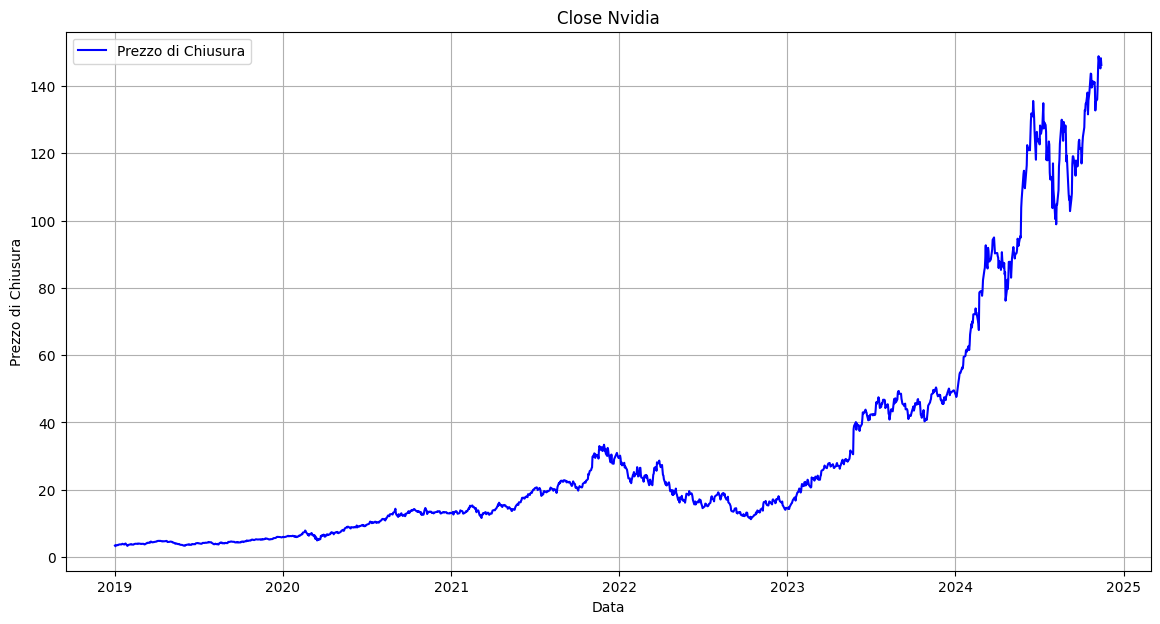

In [4]:
# Filtrare i dati per il simbolo 'NVDA'
nvda_data = data[data['Symbol'] == 'NVDA']

# Convertire la colonna 'Date' in formato datetime
nvda_data['Date'] = pd.to_datetime(nvda_data['Date'])

# Filtrare i dati per includere solo quelli dal 2019 in poi
nvda_data = nvda_data[nvda_data['Date'] >= '2019-01-01']

# Ordinare i dati per data
nvda_data = nvda_data.sort_values(by='Date')

# Tracciare il grafico dei prezzi di chiusura
plt.figure(figsize=(14, 7))
plt.plot(nvda_data['Date'], nvda_data['Close'], label='Prezzo di Chiusura', color='blue')
plt.title('Close Nvidia')
plt.xlabel('Data')
plt.ylabel('Prezzo di Chiusura')
plt.grid(True)
plt.legend()
plt.show()


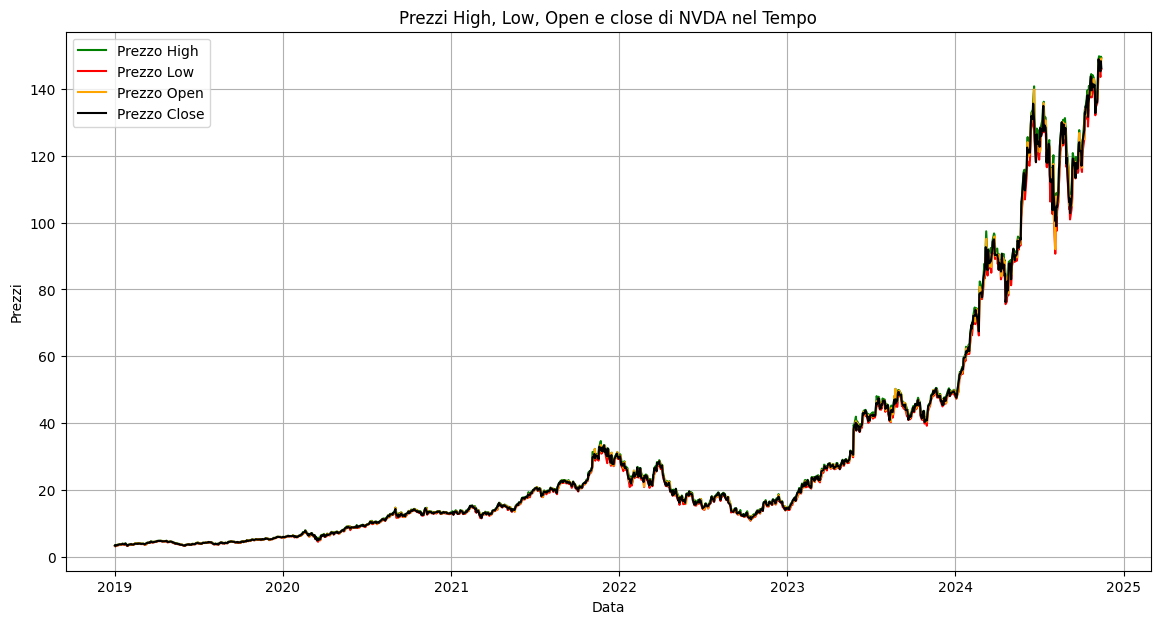

In [5]:
    # Tracciare il grafico dei prezzi di High, Low e Open
plt.figure(figsize=(14, 7))
plt.plot(nvda_data['Date'], nvda_data['High'], label='Prezzo High', color='green')
plt.plot(nvda_data['Date'], nvda_data['Low'], label='Prezzo Low', color='red')
plt.plot(nvda_data['Date'], nvda_data['Open'], label='Prezzo Open', color='orange')
plt.plot(nvda_data['Date'], nvda_data['Close'], label='Prezzo Close', color='black')
plt.title('Prezzi High, Low, Open e close di NVDA nel Tempo')
plt.xlabel('Data')
plt.ylabel('Prezzi')
plt.grid(True)
plt.legend()
plt.show()

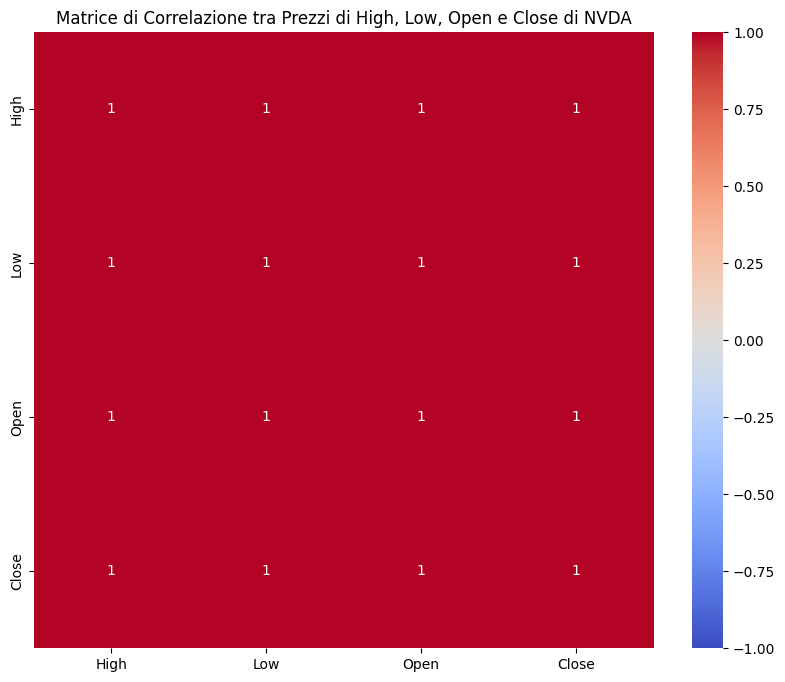

Statistiche descrittive per High, Low, Open e Close:

              High          Low         Open        Close
count  1478.000000  1478.000000  1478.000000  1478.000000
mean     31.046739    29.868270    30.478865    30.486058
std      34.702474    33.373683    34.090234    34.063212
min       3.379000     3.192250     3.266000     3.199750
25%       9.458750     9.129875     9.230875     9.235625
50%      17.515000    16.727501    17.015499    17.060000
75%      39.085999    37.175749    37.848499    37.744249
max     149.770004   146.259995   149.050003   148.880005


In [7]:
# Calcolare la correlazione tra le variabili
correlation_matrix = nvda_data[['High', 'Low', 'Open', 'Close']].corr()

# Visualizzare la matrice di correlazione
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice di Correlazione tra Prezzi di High, Low, Open e Close di NVDA')
plt.show()

# Stampare statistiche descrittive per confrontare i valori
print("Statistiche descrittive per High, Low, Open e Close:\n")
print(nvda_data[['High', 'Low', 'Open', 'Close']].describe())

Visto che le grandezze analizzate sono molto correlate tra di loro con una simile media e std, ci concentriamo sul prezzo di apertura(open) e chiusura(close), cercando di prevedere la differenza open-close, per cosservare quanto è conveniente vendere in quel giorno.

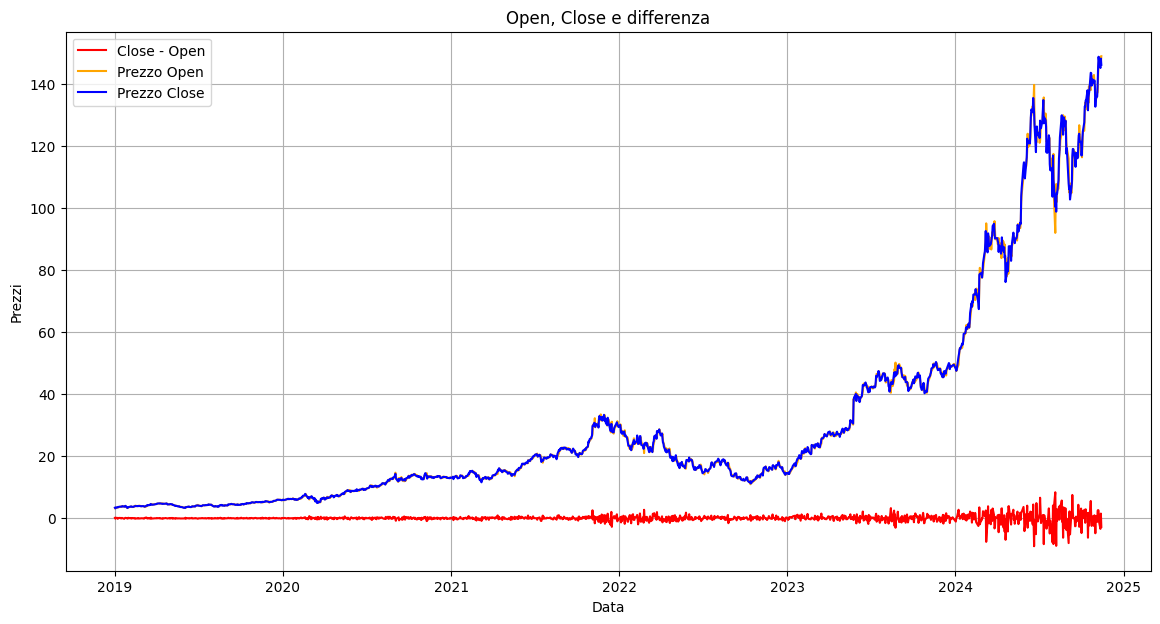

In [8]:
    # Tracciare il grafico dei prezzi di High, Low e Open
plt.figure(figsize=(14, 7))
plt.plot(nvda_data['Date'], nvda_data['Close']-nvda_data['Open'], label='Close - Open', color='red')
plt.plot(nvda_data['Date'], nvda_data['Open'], label='Prezzo Open', color='orange')
plt.plot(nvda_data['Date'], nvda_data['Close'], label='Prezzo Close', color='blue')
plt.title('Open, Close e differenza')
plt.xlabel('Data')
plt.ylabel('Prezzi')
plt.grid(True)
plt.legend()
plt.show()

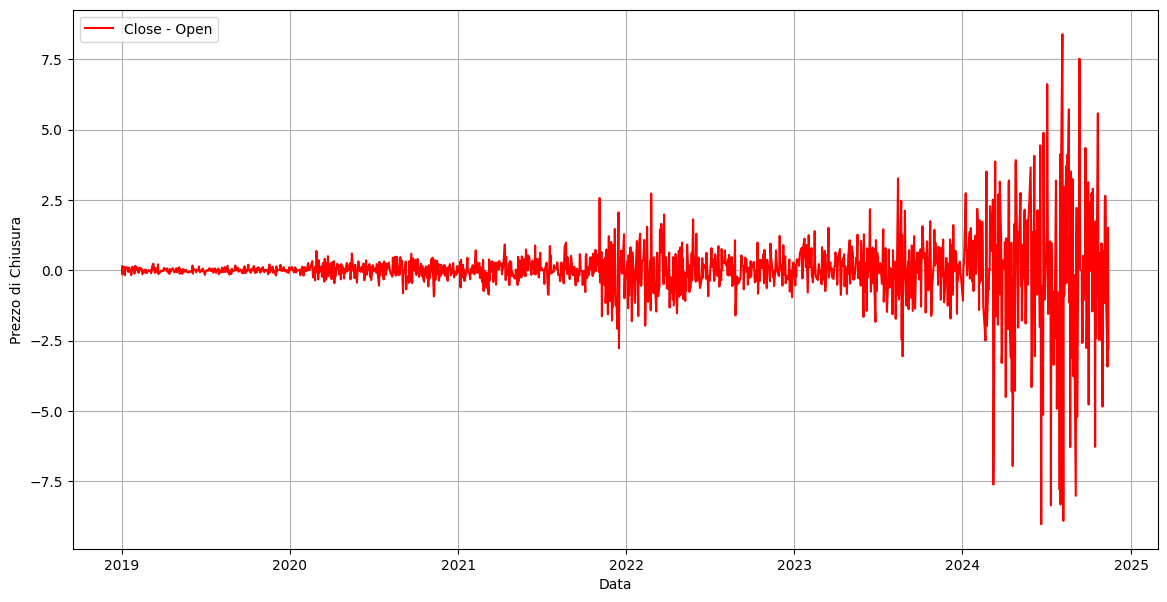

In [9]:
plt.figure(figsize=(14, 7))
plt.plot(nvda_data['Date'], nvda_data['Close']-nvda_data['Open'], label='Close - Open', color='red')
plt.xlabel('Data')
plt.ylabel('Prezzo di Chiusura')
plt.grid(True)
plt.legend()
plt.show()

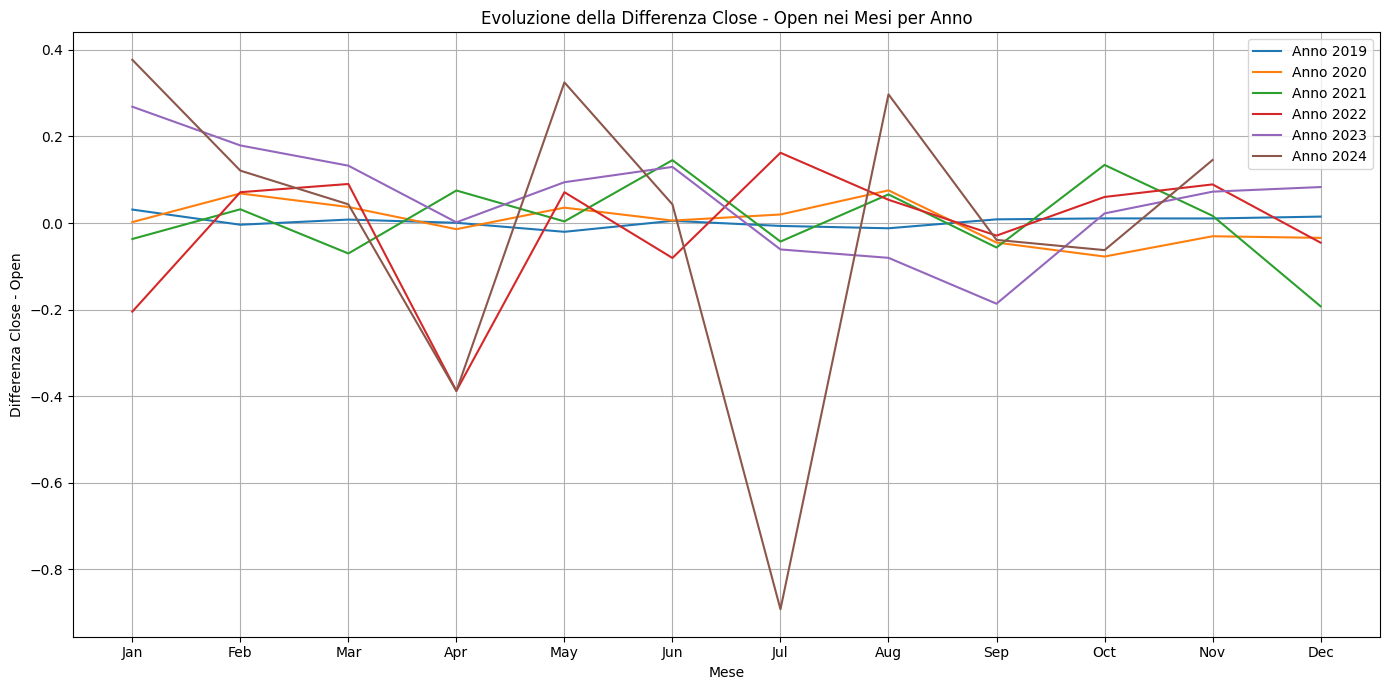

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Assumiamo che 'nvda_data' sia già definito con le colonne 'Date', 'Close', 'Open'

# Assicurati che 'Date' sia nel formato datetime
nvda_data['Date'] = pd.to_datetime(nvda_data['Date'])

# Calcolare la differenza Close - Open
nvda_data['Close-Open'] = nvda_data['Close'] - nvda_data['Open']

# Aggiungere colonne per anno e mese
nvda_data['Year'] = nvda_data['Date'].dt.year
nvda_data['Month'] = nvda_data['Date'].dt.month

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Creare il grafico
plt.figure(figsize=(14, 7))

# Per ogni anno, traccia la differenza Close-Open per i mesi
for year in nvda_data['Year'].unique():
    monthly_diff = nvda_data[nvda_data['Year'] == year].groupby('Month')['Close-Open'].mean()
    plt.plot(monthly_diff.index, monthly_diff.values, label=f'Anno {year}')

plt.xlabel('Mese')
plt.ylabel('Differenza Close - Open')
plt.title('Evoluzione della Differenza Close - Open nei Mesi per Anno')
plt.grid(True)
plt.legend()
plt.xticks(range(1, 13), labels=month_names)  # Aggiungi i numeri dei mesi (1-12)
plt.tight_layout()
plt.show()


## Decomposizione STL

In [11]:
# Ordina il DataFrame per la colonna Date
nvda_data = nvda_data.sort_values(by='Date')

# Trova la data di cutoff per gli ultimi 21 giorni
cutoff_date = nvda_data['Date'].max() - pd.Timedelta(days=120)

# Crea il DataFrame train e test
train_data = nvda_data[nvda_data['Date'] <= cutoff_date]
test_data = nvda_data[nvda_data['Date'] > cutoff_date]

# Stampa o verifica i DataFrame
print("Train DataFrame:")
print(train_data.head())

print("\nTest DataFrame:")
print(test_data.head())
print(f"Lughezza test: {len(test_data)}")
print(f"Lughezza train: {len(train_data)}")
print(f"Lunghezza totale: {len(nvda_data)}")


Train DataFrame:
              Date Symbol  Adj Close    Close     High      Low     Open  \
1308222 2019-01-02   NVDA   3.378323  3.40550  3.46200  3.25125  3.26600   
1308223 2019-01-03   NVDA   3.174214  3.19975  3.37900  3.19225  3.34475   
1308224 2019-01-04   NVDA   3.377579  3.40475  3.44325  3.24250  3.27350   
1308225 2019-01-07   NVDA   3.556390  3.58500  3.62225  3.41075  3.46250   
1308226 2019-01-08   NVDA   3.467853  3.49575  3.66950  3.42250  3.66725   

              Volume  Close-Open  Year  Month  
1308222  508752000.0     0.13950  2019      1  
1308223  705552000.0    -0.14500  2019      1  
1308224  585620000.0     0.13125  2019      1  
1308225  709160000.0     0.12250  2019      1  
1308226  786016000.0    -0.17150  2019      1  

Test DataFrame:
              Date Symbol   Adj Close       Close        High         Low  \
1309615 2024-07-17   NVDA  117.979904  117.989998  121.849998  116.720001   
1309616 2024-07-18   NVDA  121.079636  121.089996  122.400002  116.

In [12]:
import copy


train_data['Difference'] = train_data['Close'] - train_data['Open']
train_data.head()


nvda_data_copy = copy.deepcopy(train_data)
# Verifica che la colonna 'data' sia in formato datetime
nvda_data_copy['Date'] = pd.to_datetime(nvda_data['Date'])

# Imposta la colonna 'data' come indice del DataFrame
nvda_data_copy.set_index('Date', inplace=True)

C:\Users\lucab\AppData\Local\Temp\ipykernel_23304\4286710890.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Difference'] = train_data['Close'] - train_data['Open']


Scomposizione in season, trend e residui della stagionalita 

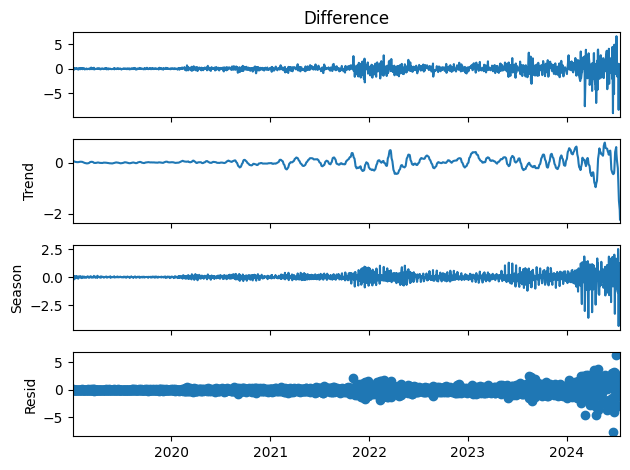

In [62]:
# Esegui la decomposizione STL
stl = STL(nvda_data_copy['Difference'], period=9)  # Modifica la stagionalità a seconda dei tuoi dati
result = stl.fit()

res = stl.fit()
fig = res.plot()



## Stationarity

In [18]:
def test_stationarity(ts):
    stats = ['Test Statistic','p-value']
    df_test = adfuller(ts)
    df_results = pd.Series(df_test[0:2], index=stats)
    
    print('ADF statistic:', df_results.iloc[0])
    print('P-value:', df_results.iloc[1])

In [19]:
test_stationarity(train_data['Difference'])

ADF statistic: -7.941096160289918
P-value: 3.3123334220603126e-12


## ACF and PACF graph

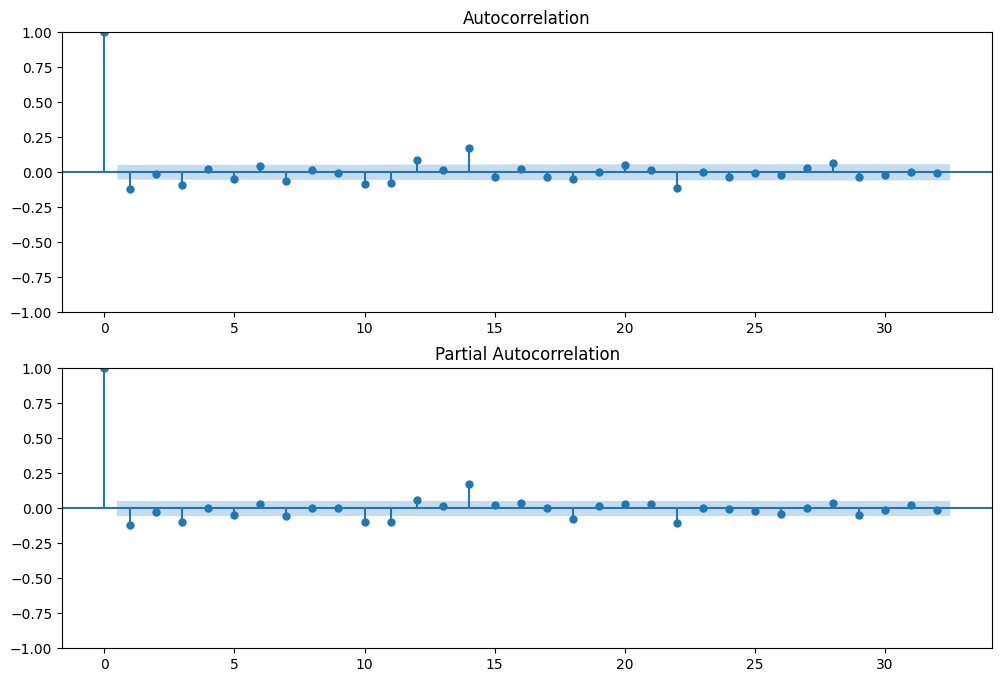

In [26]:
# ACF, PACF graphs to help determine order of ARIMA model, again statsmodel has these handy functions built-in
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_data['Difference'],  ax=ax1)   # first value of diff is NaN
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_data['Difference'], ax=ax2)

# Fitting model

## Arima

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

# Trova automaticamente il miglior modello SARIMA con auto_arima
model = auto_arima(train_data['Difference'], seasonal=False, stepwise=True, trace=True)

# Stampa i parametri del miglior modello trovato
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=3661.922, Time=0.85 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3699.117, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3680.524, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3679.040, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3673.948, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3673.784, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=3663.267, Time=0.38 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=3663.240, Time=0.58 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3672.929, Time=0.12 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=3665.440, Time=0.34 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=3667.570, Time=0.59 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=3665.151, Time=1.19 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3662.826, Time=1.18 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 5.699 seconds
                      

In [217]:
model = ARIMA(train_data['Difference'], order=(2,0,2))
results = model.fit()

print(results.summary())

c:\Users\lucab\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\lucab\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\lucab\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Difference   No. Observations:                 1393
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1825.413
Date:                Sat, 16 Nov 2024   AIC                           3662.826
Time:                        21:29:56   BIC                           3694.261
Sample:                             0   HQIC                          3674.580
                               - 1393                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0176      0.018      1.001      0.317      -0.017       0.052
ar.L1         -0.2755      0.054     -5.101      0.000      -0.381      -0.170
ar.L2          0.6398      0.046     13.890      0.0

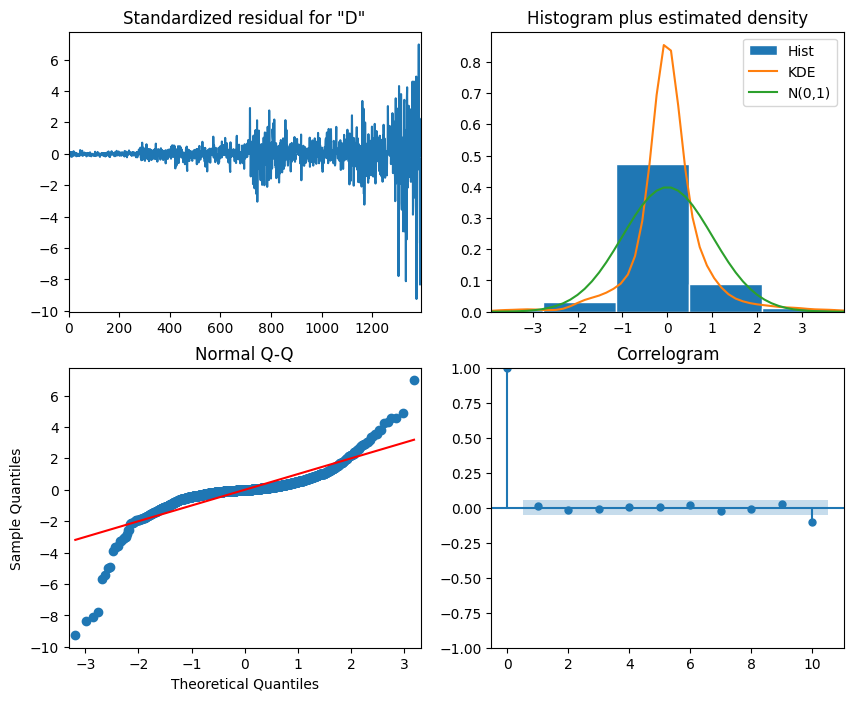

In [218]:
results.plot_diagnostics(figsize=(10, 8))
plt.show()

c:\Users\lucab\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\lucab\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


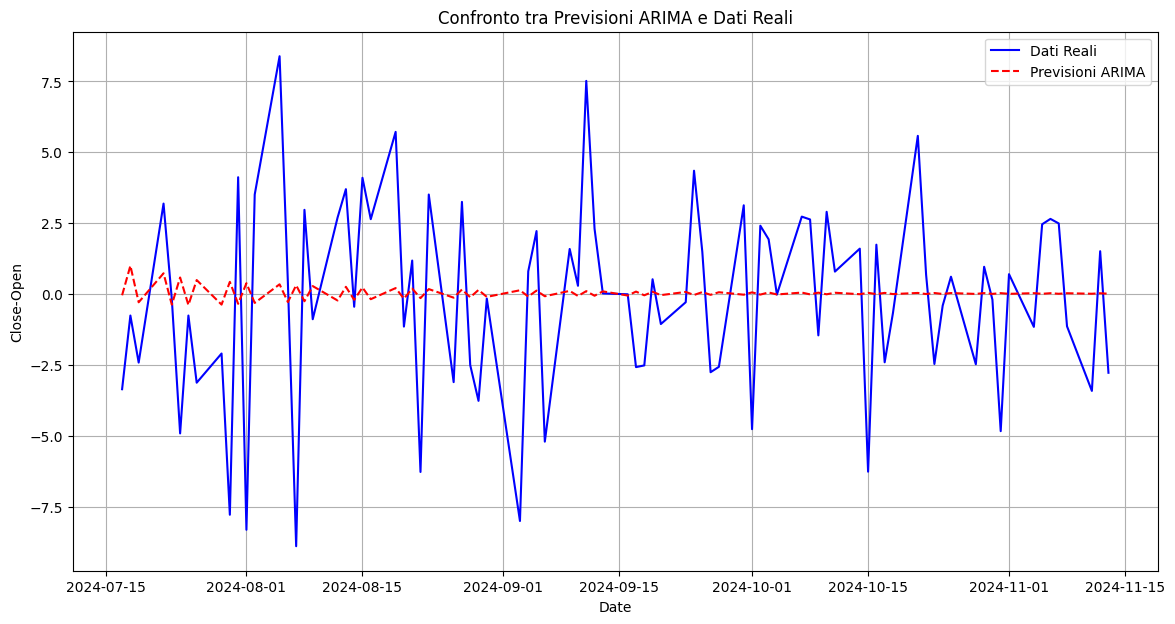

In [219]:
import pandas as pd
import matplotlib.pyplot as plt

# Assumendo che il tuo modello SARIMAX sia già stato allenato e salvato in `results_base`
# e che `test_data` sia un DataFrame contenente le colonne descritte.

# Definire le variabili esogene e la variabile target

y_true = test_data['Close-Open']

# Fare la previsione con il modello SARIMAX
predictions = results.get_forecast(steps=len(test_data))
y_pred = predictions.predicted_mean

# Impostare l'indice temporale per il grafico
y_true.index = test_data['Date']
y_pred.index = test_data['Date']

# Creare il grafico
plt.figure(figsize=(14, 7))
plt.plot(y_true, label='Dati Reali', color='blue')
plt.plot(y_pred, label='Previsioni ARIMA', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close-Open')
plt.title('Confronto tra Previsioni ARIMA e Dati Reali')
plt.legend()
plt.grid(True)
plt.show()


In [220]:
# Calcolare gli indicatori di valutazione
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Stampare gli indicatori di valutazione
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
print(f"R²: {r2:.4f}")

Mean Absolute Error (MAE): 2.7005
Mean Squared Error (MSE): 11.9856
Root Mean Squared Error (RMSE): 3.4620
Mean Absolute Percentage Error (MAPE): 1.0673
R²: -0.0193


## Sarimax

Modello SARIMAX(2,0,2)(2,0,2,5) con variabili esogene: volume

In [184]:
# Modello SARIMA
exog_vars = train_data[['Volume']]
model = sm.tsa.SARIMAX(train_data['Difference'],
                       order=(2,0,2),           # Parametri ARIMA
                       seasonal_order=(2,0,2,5), # Parametri stagionali (P, D, Q, periodo stagionale S),
                       exog=exog_vars,
                       trend='c')                  # Se includere o meno l'intercetta (opzionale)

results_base = model.fit()

# Sommario del modello
print(results_base.summary())

c:\Users\lucab\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\lucab\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                        Difference   No. Observations:                 1393
Model:             SARIMAX(2, 0, 2)x(2, 0, 2, 5)   Log Likelihood               -1822.517
Date:                           Sat, 16 Nov 2024   AIC                           3667.034
Time:                                   21:18:43   BIC                           3724.665
Sample:                                        0   HQIC                          3688.583
                                          - 1393                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0180   5.28e-20   3.41e+17      0.000       0.018       0.018
Volume      8.953e-12   2.78e-11      0.322

c:\Users\lucab\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


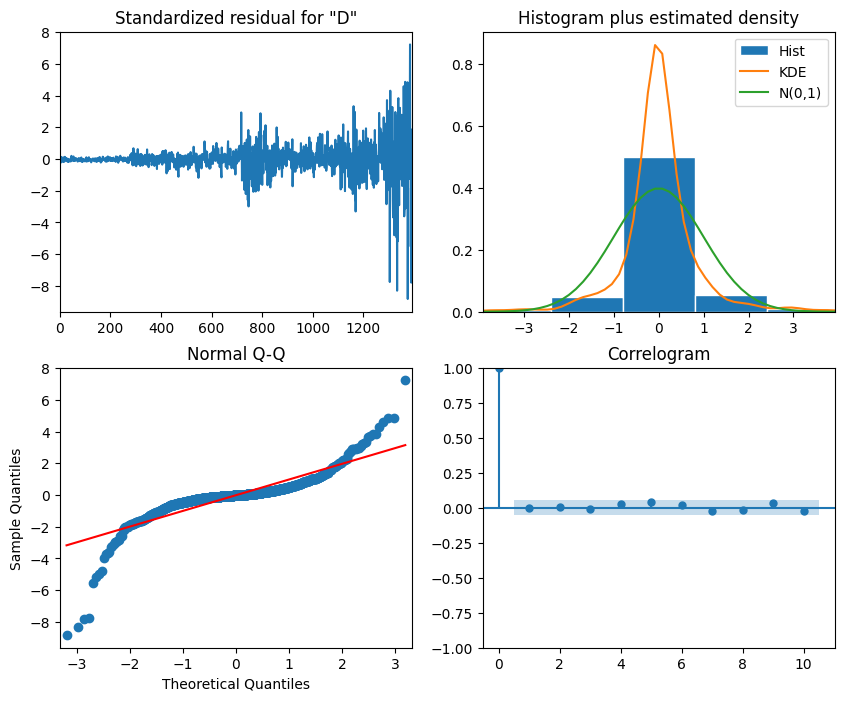

In [185]:
results_base.plot_diagnostics(figsize=(10, 8))
plt.show()

c:\Users\lucab\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\lucab\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


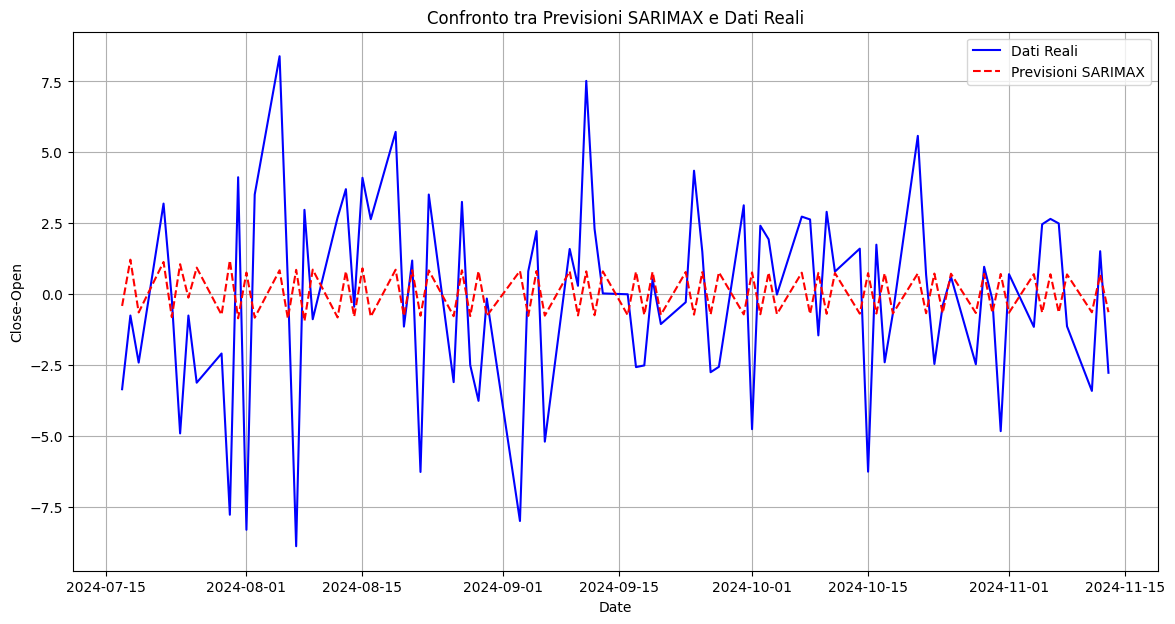

In [186]:
import pandas as pd
import matplotlib.pyplot as plt

# Assumendo che il tuo modello SARIMAX sia già stato allenato e salvato in `results_base`
# e che `test_data` sia un DataFrame contenente le colonne descritte.

# Definire le variabili esogene e la variabile target
exog_test = test_data[['Volume']]
y_true = test_data['Close-Open']

# Fare la previsione con il modello SARIMAX
predictions = results_base.get_forecast(steps=len(test_data), exog=exog_test)
y_pred = predictions.predicted_mean

# Impostare l'indice temporale per il grafico
y_true.index = test_data['Date']
y_pred.index = test_data['Date']

# Creare il grafico
plt.figure(figsize=(14, 7))
plt.plot(y_true, label='Dati Reali', color='blue')
plt.plot(y_pred, label='Previsioni SARIMAX', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close-Open')
plt.title('Confronto tra Previsioni SARIMAX e Dati Reali')
plt.legend()
plt.grid(True)
plt.show()


In [187]:
# Calcolare gli indicatori di valutazione
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Stampare gli indicatori di valutazione
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
print(f"R²: {r2:.4f}")

Mean Absolute Error (MAE): 2.7820
Mean Squared Error (MSE): 12.7694
Root Mean Squared Error (RMSE): 3.5734
Mean Absolute Percentage Error (MAPE): 2.8574
R²: -0.0860
